# Importacion de librerias y datos

In [1]:
import plotly
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('analitica_datos_salud_u18.xlsx')
df.head()

nombre_enfermedad  año_notificacion  mes_notificacion  dia_notificacion  \
0            dengue              2015                 1                 4   
1            dengue              2015                 1                 5   
2            dengue              2015                 1                 5   
3            dengue              2015                 1                 6   
4            dengue              2015                 1                 7   

               comuna genero    etapa_vida  profesion  tipo_caso  \
0   lagos del cacique      M      Infancia       9997          0   
1  cabecera del llano      F       Jovenes       9997          0   
2            oriental      M  Adolescencia       9997          0   
3               norte      F       Adultez       2226          0   
4               norte      M       Adultez       7129          0   

   año_ini_sinto  mes_ini_sinto  dia_ini_sint  
0           2015              1             4  
1           2015              1             4  
2           2015              1             2  
3           2015              1             4  
4           2015              1             4

In [3]:
reporte = pp.ProfileReport(df)
reporte.to_file(output_file="informe_inicial_datos.html")

# Analisis del dataset

In [3]:
df.isna().sum()

nombre_enfermedad    0
año_notificacion     0
mes_notificacion     0
dia_notificacion     0
comuna               0
genero               0
etapa_vida           0
profesion            0
tipo_caso            0
año_ini_sinto        0
mes_ini_sinto        0
dia_ini_sint         0
dtype: int64

In [4]:
trans_enfermedad = {"chagas": "chikungunya", 
                    "dengue grave": "chikungunya",
                    "leishmaniasis cutanea": "chikungunya",
                    "mortalidad por dengue": "chikungunya",
                    "malaria": "chikungunya",
                    "leishmaniasis mucosa": "chikungunya",
                    "leishmaniasis visceral": "chikungunya",
                    "dengue": "dengue",
                    "zika":"zika",
                    "chikungunya":"chikungunya"}
for i in df.index:
    df.at[i,"nombre_enfermedad"] = trans_enfermedad[df.at[i,"nombre_enfermedad"]]
df["nombre_enfermedad"].unique()

array(['dengue', 'chikungunya', 'zika'], dtype=object)

In [ ]:
df.to_excel("analitica_datos_salud_u18.xlsx")

# Transformaciones de los datos tipo object a numeros

In [5]:
from sklearn.preprocessing import LabelEncoder

def encodear_columnas(df,columna):
    le = LabelEncoder()
    df[columna] = le.fit_transform(df[columna])
    clases = dict(zip(le.classes_, range(0,len(le.classes_))))
    return df,clases

#encodeamos todas las columnas necesarias
columnas_encodear = df.dtypes[df.dtypes == object].index.tolist()
etiquetas_clases  = list()

for i in range(len(columnas_encodear)):
    print(columnas_encodear[i])
    df, clases = encodear_columnas(df,columnas_encodear[i])
    etiquetas_clases.append([columnas_encodear[i],clases])

df.head()

nombre_enfermedad
comuna
genero
etapa_vida


nombre_enfermedad  año_notificacion  mes_notificacion  dia_notificacion  \
0                  1              2015                 1                 4   
1                  1              2015                 1                 5   
2                  1              2015                 1                 5   
3                  1              2015                 1                 6   
4                  1              2015                 1                 7   

   comuna  genero  etapa_vida  profesion  tipo_caso  año_ini_sinto  \
0       7       1           2       9997          0           2015   
1       0       0           3       9997          0           2015   
2      13       1           0       9997          0           2015   
3      11       0           1       2226          0           2015   
4      11       1           1       7129          0           2015   

   mes_ini_sinto  dia_ini_sint  
0              1             4  
1              1             4  
2              1             2  
3              1             4  
4              1             4

In [6]:
etiquetas_clases[1]

['comuna',
 {'cabecera del llano': 0,
  'centro': 1,
  'corregimientos': 2,
  'garcia rovira': 3,
  'la ciudadela': 4,
  'la concordia': 5,
  'la pedregosa': 6,
  'lagos del cacique': 7,
  'morrorico': 8,
  'mutis': 9,
  'nororiental': 10,
  'norte': 11,
  'occidental': 12,
  'oriental': 13,
  'provenza': 14,
  'san alonso': 15,
  'san francisco': 16,
  'sin informacion': 17,
  'sur': 18,
  'sur occidental': 19}]

In [ ]:
df = df[df["comuna"] != 15]

## Normalizador

In [7]:
X = df.drop(["comuna"],axis=1)
Y = df["comuna"].values

In [8]:
df.shape

(14201, 12)

In [9]:
from sklearn.preprocessing import Normalizer
normalizador = Normalizer(norm='l2')
normalizador.fit(df)

Normalizer(copy=True, norm='l2')

In [10]:
df_normalizado = pd.DataFrame(normalizador.transform(df),columns=df.columns)
df_normalizado.head()

nombre_enfermedad  año_notificacion  mes_notificacion  dia_notificacion  \
0           0.000096          0.193839          0.000096          0.000385   
1           0.000096          0.193839          0.000096          0.000481   
2           0.000096          0.193839          0.000096          0.000481   
3           0.000277          0.557240          0.000277          0.001659   
4           0.000130          0.262457          0.000130          0.000912   

     comuna    genero  etapa_vida  profesion  tipo_caso  año_ini_sinto  \
0  0.000673  0.000096    0.000192   0.961692        0.0       0.193839   
1  0.000000  0.000000    0.000289   0.961692        0.0       0.193839   
2  0.001251  0.000096    0.000000   0.961692        0.0       0.193839   
3  0.003042  0.000000    0.000277   0.615592        0.0       0.557240   
4  0.001433  0.000130    0.000130   0.928563        0.0       0.262457   

   mes_ini_sinto  dia_ini_sint  
0       0.000096      0.000385  
1       0.000096      0.000385  
2       0.000096      0.000192  
3       0.000277      0.001106  
4       0.000130      0.000521

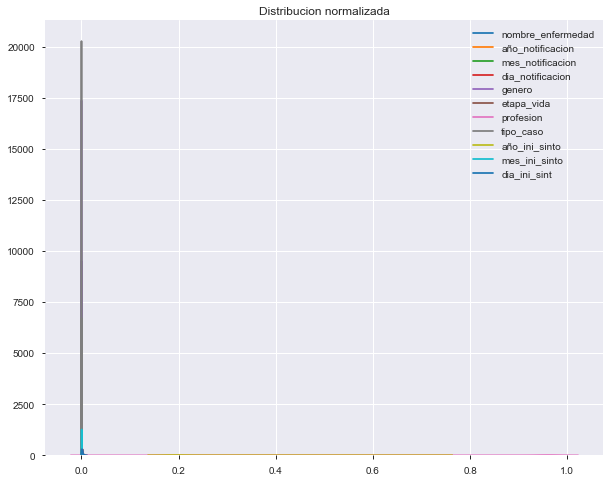

In [11]:
# Graficamos los datos normalizador para revisar su distribucion
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Distribucion normalizada')

sns.kdeplot(df_normalizado['nombre_enfermedad'], ax=ax1)
sns.kdeplot(df_normalizado['año_notificacion'], ax=ax1)
sns.kdeplot(df_normalizado['mes_notificacion'], ax=ax1)
sns.kdeplot(df_normalizado['dia_notificacion'], ax=ax1)
#sns.kdeplot(df_normalizado['comuna'], ax=ax1)
sns.kdeplot(df_normalizado['genero'], ax=ax1)
sns.kdeplot(df_normalizado['etapa_vida'], ax=ax1)
sns.kdeplot(df_normalizado['profesion'], ax=ax1)
sns.kdeplot(df_normalizado['tipo_caso'], ax=ax1)
sns.kdeplot(df_normalizado['año_ini_sinto'], ax=ax1)
sns.kdeplot(df_normalizado['mes_ini_sinto'], ax=ax1)
sns.kdeplot(df_normalizado['dia_ini_sint'], ax=ax1);

## StandarScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_normalizado)

In [ ]:
df_estandar = pd.DataFrame(scaler.transform(df_normalizado),columns=df.columns)
df_estandar.head()

In [ ]:
# Graficamos los datos estandarizados para revisar su distribucion
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Distribucion normalizada y luego estandarizada')

sns.kdeplot(df_estandar['nombre_enfermedad'], ax=ax1)
sns.kdeplot(df_estandar['año_notificacion'], ax=ax1)
sns.kdeplot(df_estandar['mes_notificacion'], ax=ax1)
sns.kdeplot(df_estandar['dia_notificacion'], ax=ax1)
sns.kdeplot(df_estandar['comuna'], ax=ax1)
sns.kdeplot(df_estandar['genero'], ax=ax1)
sns.kdeplot(df_estandar['etapa_vida'], ax=ax1)
sns.kdeplot(df_estandar['profesion'], ax=ax1)
sns.kdeplot(df_estandar['tipo_caso'], ax=ax1)
sns.kdeplot(df_estandar['año_ini_sinto'], ax=ax1)
sns.kdeplot(df_estandar['mes_ini_sinto'], ax=ax1)
sns.kdeplot(df_estandar['dia_ini_sint'], ax=ax1);

In [ ]:
# Genero el reporte con los datos ya encodeados
reporte = pp.ProfileReport(df_estandar)
reporte.to_file(output_file="informe_datos_normalizado_estandarizado.html")

# Pruebas de diferentes clasificadores y regresores

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X = df_normalizado.drop(["comuna"],axis=1)
Y = df_normalizado["comuna"].values

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

clf = DecisionTreeClassifier(max_depth=20)
#clf = SVC(gamma=3.5, kernel='rbf', C = 16)
#clf = RandomForestClassifier(n_estimators=1000)

scores = cross_val_score(clf, X, Y, cv=5)
scores